<a href="https://colab.research.google.com/github/mathpoirot/Python-for-Business-Analytics-Class/blob/main/POIROT_Mathilde_Python_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT


# **Step 1: Select a Dataset**
I used Kaggle to find my dataset. I chose an employee performance dataset as I find it interesting to analyze the way people's performances are rated.

In [4]:
!pip install pandas
import pandas as pd

employeep = pd.read_csv('https://raw.githubusercontent.com/mathpoirot/Python-for-Business-Analytics-Class/refs/heads/main/dataset_employee_performance.csv')
print(employeep.head())

   ID                Name  Age  Gender Department  Salary Joining Date  \
0   1        Cory Escobar   48  Female         HR    5641   2015-05-03   
1   2     Timothy Sanchez   25   Other      Sales    4249   2020-11-09   
2   3        Chad Nichols   57   Other      Sales    3058   2019-02-12   
3   4  Christine Williams   58  Female         IT    5895   2017-09-08   
4   5        Amber Harris   35   Other         IT    4317   2020-02-15   

   Performance Score  Experience    Status     Location  Session  
0                3.0           1    Active     New York    Night  
1                4.0           8  Inactive  Los Angeles  Evening  
2                2.0           8  Inactive     New York  Morning  
3                4.0          15  Inactive  Los Angeles  Evening  
4                2.0           1  Inactive     New York  Evening  


We notice that the different columns of the CSV file are the following : *ID, Name, Age, Gender, Department, Salary, Joining Date, Performance Score, Experience, Status, Location, Session*


# **Step 2: Tasks and Requirements**


# **1. Basic Python Programming**

First, let's introduce some variables and add them to lists.
We can then put those lists in dictionaries to facilitate the analysis process.

In [5]:
ID = employeep['ID'].tolist()
names = employeep['Name'].tolist()
performances = employeep['Performance Score'].tolist()
age = employeep['Age'].tolist()
gender = employeep['Gender'].tolist()
department = employeep['Department'].tolist()
salary = employeep['Salary'].tolist()
joining_date = employeep['Joining Date'].tolist()
experience = employeep['Experience'].tolist()
status = employeep['Status'].tolist()
location = employeep['Location'].tolist()


performance_dict = dict(zip(names, performances))
identification_dict = dict(zip(names, ID))

Using conditional statements, I will translate the grade to a statement using the performance dictionnary to link the employee to their performance.

In [6]:
import numpy as np
import seaborn as sns
for name, performance in performance_dict.items():
  if performance == 5.0 :
    print(f"{name} has a perfect performance with a score of {performance}.")
  elif performance >= 4.0 :
    print(f"{name} has an excellent performance with a score of {performance}.")
  elif performance >= 3.0 :
    print(f"{name} has a good performance with a score of {performance}.")
  elif performance >= 2.0 :
    print(f"{name} has a fair performance with a score of {performance}.")
  elif performance >= 1.0 :
    print(f"{name}'s performance needs improvement with a score of {performance}.")
  else :
    print(f"{name} has no recorded performance, if you mean to change that, change '{performance}' to their actual performance")



Cory Escobar has a good performance with a score of 3.0.
Timothy Sanchez has an excellent performance with a score of 4.0.
Chad Nichols has a fair performance with a score of 2.0.
Christine Williams has an excellent performance with a score of 4.0.
Amber Harris has a fair performance with a score of 2.0.
Ashley Howe's performance needs improvement with a score of 1.0.
David Olson's performance needs improvement with a score of 1.0.
Amanda Baker has no recorded performance, if you mean to change that, change 'nan' to their actual performance
Jeremy Wright's performance needs improvement with a score of 1.0.
Brian Faulkner has a perfect performance with a score of 5.0.
Nicole Bell has a fair performance with a score of 2.0.
Rodney Richardson has no recorded performance, if you mean to change that, change 'nan' to their actual performance
Joshua Robinson has a fair performance with a score of 2.0.
Benjamin Callahan has an excellent performance with a score of 4.0.
Matthew Collins MD has a

In [7]:
def analyze_performance(performance):
  if performance == 5.0 :
    return "perfect"
  elif performance >= 4.0 :
    return "excellent"
  elif performance >= 3.0 :
    return "good"
  elif performance >= 2.0 :
    return "fair"
  elif performance >= 1.0 :
    return "needs improvement"
  elif performance >= 0.0 :
    return "poor"
  else :
    return "no recorded performance"

def performance_report(dataset):
  for index, row in dataset.iterrows():
    name = row['Name']
    performance = row['Performance Score']
    status = row['Status'].lower()
    ID = row['ID']
    analysis = analyze_performance(performance)
    print(f"{name} has a {analysis} performance with a score of {performance}. Their ID is {ID} and they are currently {status}")

performance_report(employeep)

Cory Escobar has a good performance with a score of 3.0. Their ID is 1 and they are currently active
Timothy Sanchez has a excellent performance with a score of 4.0. Their ID is 2 and they are currently inactive
Chad Nichols has a fair performance with a score of 2.0. Their ID is 3 and they are currently inactive
Christine Williams has a excellent performance with a score of 4.0. Their ID is 4 and they are currently inactive
Amber Harris has a fair performance with a score of 2.0. Their ID is 5 and they are currently inactive
Ashley Howe has a needs improvement performance with a score of 1.0. Their ID is 6 and they are currently active
David Olson has a needs improvement performance with a score of 1.0. Their ID is 7 and they are currently active
Amanda Baker has a no recorded performance performance with a score of nan. Their ID is 8 and they are currently inactive
Jeremy Wright has a needs improvement performance with a score of 1.0. Their ID is 9 and they are currently inactive
Bri

I believe creating another reusable function to **give the mean performance score for each department** could be useful. We'll see **which department is performing better.**

In [8]:
performance_by_dept = employeep.groupby('Department')['Performance Score'].mean()
performance_by_dept

,Performance Score
Department,
HR,2.641892
IT,3.461538
Sales,2.656667


# **2. Data Manipulation**

Let's start by **checking the first few lines, general information and some statistics about the dataset.**

In [10]:
print(employeep.head())
print(employeep.info())
print(employeep.describe())

   ID                Name  Age  Gender Department  Salary Joining Date  \
0   1        Cory Escobar   48  Female         HR    5641   2015-05-03   
1   2     Timothy Sanchez   25   Other      Sales    4249   2020-11-09   
2   3        Chad Nichols   57   Other      Sales    3058   2019-02-12   
3   4  Christine Williams   58  Female         IT    5895   2017-09-08   
4   5        Amber Harris   35   Other         IT    4317   2020-02-15   

   Performance Score  Experience    Status     Location  Session  
0                3.0           1    Active     New York    Night  
1                4.0           8  Inactive  Los Angeles  Evening  
2                2.0           8  Inactive     New York  Morning  
3                4.0          15  Inactive  Los Angeles  Evening  
4                2.0           1  Inactive     New York  Evening  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  

We can notice several different things that we will be able to use later on in our analysis :


*   With employeep.head() and the first lines of the dataset, we notice there is no specific group or order in the way the rows appear
*   With employeep.info(), we notice that **within the 1000 entries, only 895 of them are non-null**, this implies that 105 of them *are* null. We also notice which column is of the integer type, which leads us to the following point.
* With employeep.describe(), we learn some really interesting points for the rest of the analysis :
  * **ID** : The **1000 employees have a different ID** going from 1 to 1000.
  * **Age** : Going from 18 to 65 with a mean of 40 and a standard deviation of 14.
  * **Salary** : With a mean of 5917 and a standard deviation of 2299, **salaries vary considerably**, which may indicate a wide range of job levels and **experience** among employees.
  * **Performance score** : The scores seem to be balanced and to make sense, going from 0.0 to 5.0 with a mean of 2.9.
  * **Experience** : Average experience is of 10.3 years with a standard deviation of 5.7 years. The minimum and maximum being respectively 1 year and 20 years. **Combined with the age, we see that employees vary in age and level of experience, which might influence their performance and salaries.**




Let's start the data manipulation by **checking whether there are duplicates or not.**

In [11]:
duplicates = employeep.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


There are **no duplicates.**

Let's follow by **managing the missing values.**

In [12]:
print(employeep.isna().sum())

ID                     0
Name                   0
Age                    0
Gender                 0
Department             0
Salary                 0
Joining Date           0
Performance Score    105
Experience             0
Status                 0
Location               0
Session                0
dtype: int64


The **missing values are only linked to the performance scores**. One solution could be to drop the rows where there are missing values. However, a lot of data from the dataset would be dropped. Lets think of another solution.
Instead, we will **replace them with the mean of the performance score of the departments they belong to** using the ***performance_by_dept* reusable function we created earlier.**

In [13]:
for i, row in employeep.iterrows():
    if pd.isna(row['Performance Score']):
        dept = row['Department']
        employeep.at[i, 'Performance Score'] = performance_by_dept[dept]
print(employeep.isna().sum())
print(employeep.describe())

ID                   0
Name                 0
Age                  0
Gender               0
Department           0
Salary               0
Joining Date         0
Performance Score    0
Experience           0
Status               0
Location             0
Session              0
dtype: int64
                ID          Age       Salary  Performance Score   Experience
count  1000.000000  1000.000000  1000.000000        1000.000000  1000.000000
mean    500.500000    40.782000  5917.374000           2.924746    10.343000
std     288.819436    14.124871  2299.418003           1.466271     5.736747
min       1.000000    18.000000  2015.000000           0.000000     1.000000
25%     250.750000    28.000000  3829.750000           2.000000     5.000000
50%     500.500000    40.000000  5889.000000           3.000000    10.000000
75%     750.250000    52.000000  7903.250000           4.000000    15.000000
max    1000.000000    65.000000  9993.000000           5.000000    20.000000


Now, onto **filtering, sorting, and grouping data to extract meaningful subsets or patterns.**
There is not much to do with the ID, the name or the gender.
However, we can deal with the experience by **creating a new column 'Seniority'**, to label employees as either **'Junior', 'Medior' or 'Senior'.**

In [14]:
def seniority(experience):
    if experience < 5:
        return 'Junior'
    elif 5 <= experience < 10:
        return 'Medior'
    else:
        return 'Senior'

employeep['Seniority'] = employeep['Experience'].apply(seniority)
employeep[['Name', 'Age', 'Salary', 'Performance Score', 'Seniority']].head(10)

,Name,Age,Salary,Performance Score,Seniority
0,Cory Escobar,48,5641,3.000000,Junior
1,Timothy Sanchez,25,4249,4.000000,Medior
2,Chad Nichols,57,3058,2.000000,Medior
3,Christine Williams,58,5895,4.000000,Senior
4,Amber Harris,35,4317,2.000000,Junior
5,Ashley Howe,29,2591,1.000000,Senior
6,David Olson,39,6826,1.000000,Senior
7,Amanda Baker,52,6285,2.641892,Senior
8,Jeremy Wright,63,9862,1.000000,Junior
9,Brian Faulkner,30,8202,5.000000,Senior


The obvious column we want to be **focusing on** is the **Performance score** one. We can start by **finding the high performers**, in order for the company to reward them. We can also take a look at the **repartition of high performers between the departments and seniority.**
Similarly, we can **do the same for low performers so that managers can try to help them improve.**

In [20]:
employeep['Performance Category'] = employeep['Performance Score'].apply(analyze_performance)

high_performers = employeep[employeep['Performance Category'].isin(['perfect'])]
high_performers_by_department = high_performers.groupby('Department').size().sort_values(ascending=False)
high_performers_by_seniority = high_performers.groupby('Seniority').size().sort_values(ascending=False)

low_performers = employeep[employeep['Performance Category'].isin(['poor', 'needs improvement'])]
low_performers_by_department = low_performers.groupby('Department').size().sort_values(ascending=False)
low_performers_by_seniority = low_performers.groupby('Seniority').size().sort_values(ascending=False)

high_performers[['Name', 'Age', 'Salary', 'Performance Score', 'Seniority']]

,Name,Age,Salary,Performance Score,Seniority
9,Brian Faulkner,30,8202,5.0,Senior
26,Austin Long,20,4899,5.0,Junior
30,Brandi Smith,21,4780,5.0,Medior
31,Jacqueline Becker,63,4270,5.0,Senior
33,Mr. Brian Nelson,42,5207,5.0,Senior
...,...,...,...,...,...
974,Brett Myers,37,3288,5.0,Junior
975,Bryce Anderson,52,2093,5.0,Senior
986,Melissa Bradley,39,9618,5.0,Medior
996,Todd Johnson,29,6754,5.0,Senior


In [16]:
high_performers_by_department

,0
Department,
IT,86
Sales,44
HR,37


In [17]:
high_performers_by_seniority

,0
Seniority,
Senior,90
Medior,50
Junior,27


In [18]:
low_performers[['Name', 'Age', 'Salary', 'Performance Score', 'Seniority']]

,Name,Age,Salary,Performance Score,Seniority
5,Ashley Howe,29,2591,1.0,Senior
6,David Olson,39,6826,1.0,Senior
8,Jeremy Wright,63,9862,1.0,Junior
29,Rachel Ramsey,22,9661,0.0,Senior
37,Lawrence Rose,18,2904,1.0,Medior
...,...,...,...,...,...
955,Erin Kelley,49,3437,0.0,Senior
958,Morgan Coleman,51,6415,0.0,Junior
983,David Moody,43,8830,0.0,Senior
990,Amy Johnston,53,3991,1.0,Senior


In [21]:
low_performers_by_department

,0
Department,
Sales,76
HR,74
IT,32


In [22]:
low_performers_by_seniority

,0
Seniority,
Senior,93
Medior,49
Junior,40


# **3. Mathematical Operations**

*NOTE : This goes with the filtering, sorting and ordering but since I started working with sums and other mathematicals operations I still started this section here.*




Now, I believe it could be interesting to take a peek at the **salaries to see if they make sense in accordance to the performance score.**
We can start by **calculating the % contribution of each employee's salary to the company, to their department and to their seniority level.**

In [26]:
total_company_salary = employeep['Salary'].sum()
employeep['Department Total Salary'] = employeep.groupby('Department')['Salary'].transform('sum')
employeep['Seniority Total Salary'] = employeep.groupby('Seniority')['Salary'].transform('sum')

employeep['Salary % of Total'] = (employeep['Salary'] / total_company_salary) * 100
employeep['Salary % of Department'] = (employeep['Salary'] / employeep['Department Total Salary']) * 100
employeep['Salary % of Seniority'] = (employeep['Salary'] / employeep['Seniority Total Salary']) * 100

employeep[['Name', 'Department', 'Seniority', 'Salary', 'Salary % of Total', 'Salary % of Department', 'Salary % of Seniority']]

,Name,Department,Seniority,Salary,Salary % of Total,Salary % of Department,Salary % of Seniority
0,Cory Escobar,HR,Junior,5641,0.095329,0.291930,0.475348
1,Timothy Sanchez,Sales,Medior,4249,0.071806,0.216589,0.267787
2,Chad Nichols,Sales,Medior,3058,0.051678,0.155879,0.192726
3,Christine Williams,IT,Senior,5895,0.099622,0.291359,0.187503
4,Amber Harris,IT,Junior,4317,0.072955,0.213367,0.363779
...,...,...,...,...,...,...,...
995,Pamela Reeves,Sales,Medior,7652,0.129314,0.390054,0.482257
996,Todd Johnson,Sales,Senior,6754,0.114138,0.344279,0.214825
997,Michael Sanchez,Sales,Junior,5278,0.089195,0.269041,0.444759
998,Ashley Taylor,IT,Senior,5437,0.091882,0.268722,0.172935


Following the same train of thoughts. I can also check the **contribution to salary total for low and high performers.**

In [28]:
high_performers_salary_contribution = high_performers['Salary'].sum() / total_company_salary * 100
low_performers_salary_contribution = low_performers['Salary'].sum() / total_company_salary * 100

print(f"High performers contribute {high_performers_salary_contribution:.2f}% to the total salary.")
print(f"Low performers contribute {low_performers_salary_contribution:.2f}% to the total salary.")


High performers contribute 16.80% to the total salary.
Low performers contribute 17.00% to the total salary.


Now, I want to see the **correlation between salary and performance score.**

In [29]:
correlation = employeep['Salary'].corr(employeep['Performance Score'])
print(f'Correlation between Salary and Performance Score: {correlation}')

Correlation between Salary and Performance Score: 0.05963359925060133


The correlation is near 0. Thus, it is very low and it means that **Performance Score and Salary don't seem to be correlated**. Thus, employees earning a higher wage won't have a better performance than low wage employees.

# **4. Data Visualisation**

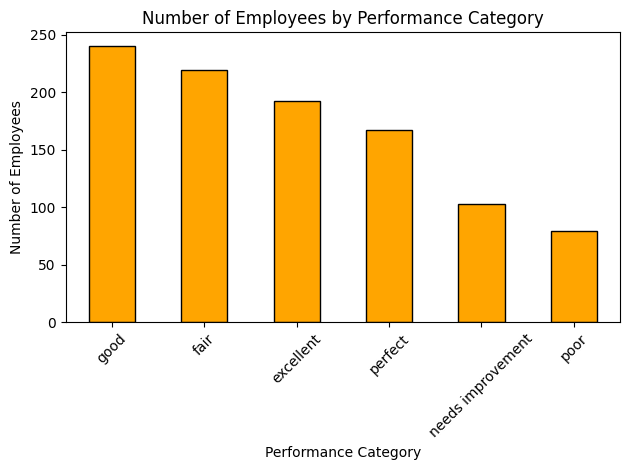

In [35]:
import matplotlib.pyplot as plt

performance_category_count = employeep['Performance Category'].value_counts()

performance_category_count.plot(kind='bar', color='orange', edgecolor='black')

plt.xlabel('Performance Category')
plt.ylabel('Number of Employees')
plt.title('Number of Employees by Performance Category')
plt.xticks(rotation=45)
plt.tight_layout()